In [10]:
pip install torch==1.8.1+cu102 torchvision==0.9.1+cu102 torchaudio===0.8.1 -f https://download.pytorch.org/whl/torch_stable.html

Looking in links: https://download.pytorch.org/whl/torch_stable.html
Note: you may need to restart the kernel to use updated packages.


In [1]:
import torch
print(torch.__version__)

1.8.1+cu102


In [2]:
import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms

from model_resnet import ResNet
from model_resnet import ResidualBlock

# Device configuration
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

model = ResNet(ResidualBlock, [2, 2, 2]).to(device)

In [3]:
#Threshold 변경해가면서 Original data의 Accuracy가 기존의 88%와 비슷한 threshold를 찾는다
#필요한것 sorted_images_index / resnet_trained_model.ckpt / resnet_trainged_model_state.ckpt
# segmented_data.pt


import torch
import torchvision
import torchvision.transforms as transforms


# data load
batch_size = 100

test_dataset = torchvision.datasets.CIFAR10(root='../../data/',
                                            train=False,download=True,
                                            transform=transforms.ToTensor())

test_loader = torch.utils.data.DataLoader(dataset=test_dataset,
                                          batch_size=batch_size, shuffle=False)
"""
original_images = []
for images,_ in test_loader:
    original_images.append(images)
"""

#original_data = torch.stack(original_images, dim=0)
segmented_data = torch.load('segmented_data.pt')
#augmented_data = original_data
sorted_images_index_100 = []

# data augmentation
with torch.no_grad():
    for i in range(100):                               # 100 = len(original_data)
        images_batch = segmented_data[i]
        for j in range(100):                           # 100 = len(images_batch)
            segmented_image = images_batch[j]
            
            """수정된부분"""
            object_pixel=0
            
            for m in range(segmented_image.shape[0]):                   #[1],[2] 였는데 [0],[1]로 바꿈 저번에는 왜됐지?
                for n in range(segmented_image.shape[1]):
                    if segmented_image[m][n] != 0:
                        object_pixel += 1
                        
            if object_pixel >= 100:
                sorted_images_index_100.append((i*batch_size+(j+1)))
        #print(i+1," batch complete")
        
"""수정된부분"""
print("sorted_images_index_100 : Done")
#object_pixel>=150 인 사진들의 index를 기억한 후에 (Not zero-based)
#interfere과정에서 해당 index의 사진들만 interfere를 진행




Files already downloaded and verified
sorted_images_index_100 : Done


In [4]:
sorted_images_index_50 = []

with torch.no_grad():
    for i in range(100):                               # 100 = len(original_data)
        images_batch = segmented_data[i]
        for j in range(100):                           # 100 = len(images_batch)
            segmented_image = images_batch[j]
            
            """수정된부분"""
            object_pixel=0
            
            for m in range(segmented_image.shape[0]):
                for n in range(segmented_image.shape[1]):
                    if segmented_image[m][n] != 0:
                        object_pixel += 1
                        
            if object_pixel >= 50:
                sorted_images_index_50.append((i*batch_size+(j+1)))
       # print(i+1," batch complete")
print('Thr = 50 Done')

Thr = 50 Done


In [5]:
sorted_images_index_150 = []

with torch.no_grad():
    for i in range(100):                               # 100 = len(original_data)
        images_batch = segmented_data[i]
        for j in range(100):                           # 100 = len(images_batch)
            segmented_image = images_batch[j]
            
            """수정된부분"""
            object_pixel=0
            
            for m in range(segmented_image.shape[0]):
                for n in range(segmented_image.shape[1]):
                    if segmented_image[m][n] != 0:
                        object_pixel += 1
                        
            if object_pixel >= 150:
                sorted_images_index_150.append((i*batch_size+(j+1)))
        #print(i+1," batch complete")
print("Thr=150 Done")

Thr=150 Done


In [20]:
with torch.no_grad():
    correct = 0
    total = 0
    for data in test_loader:                             #100 = len(augmented_data) = 10000 / batch_size
            images, labels = data
            images = images.to(device)
            labels = labels.to(device)
            outputs = model(images)
            _, predicted = torch.max(outputs.data, 1)    
            
            """수정된부분"""
            #index에 들어있는 사진들만 interfere를 진행
            for j in range(batch_size):
                if( (i*batch_size)+(j+1) in sorted_images_index_150):     
                    total += 1
                    if( predicted[j]==labels[j]):
                        correct += 1

    print('Accuracy of the model on the test images about Thr=150: {} %'.format(100 * correct / total))


Accuracy of the model on the test images about Thr=150: 88.69354838709677 %


In [7]:
#2. Loading Segmented dataset (our dataset)
"""---------------blue---------------"""
#augmented_data = torch.load('blue_augmented_data.pt')
#label_set = []
#for _,labels in test_loader:
#    label_set.append(labels)
#augmented_labels = torch.stack(label_set, dim=0)

#print(augmented_data.shape)
#print(augmented_labels.shape)



test_dataset = torchvision.datasets.CIFAR10(root='../../data/',
                                            train=False,download=True,
                                            transform=transforms.ToTensor())

test_loader = torch.utils.data.DataLoader(dataset=test_dataset,
                                          batch_size=batch_size, shuffle=False)

# Test the model
model = torch.load('resnet_trained_model.ckpt')
model.load_state_dict(torch.load('resnet_trained_model_state.ckpt'))
model.eval()
with torch.no_grad():
    correct = 0
    total = 0
    for data in test_loader:                             #100 = len(augmented_data) = 10000 / batch_size
            images, labels = data
            images = images.to(device)
            labels = labels.to(device)
            outputs = model(images)
            _, predicted = torch.max(outputs.data, 1)    
            
            """수정된부분"""
            #index에 들어있는 사진들만 interfere를 진행
            for j in range(batch_size):
                if( (i*batch_size)+(j+1) in sorted_images_index_100):     
                    total += 1
                    if( predicted[j]==labels[j]):
                        correct += 1

    print('Accuracy of the model on the test images about Thr=100: {} %'.format(100 * correct / total))


Files already downloaded and verified
Accuracy of the model on the test images about Thr=100: 88.65217391304348 %


In [8]:
with torch.no_grad():
    correct = 0
    total = 0
    for data in test_loader:                             #100 = len(augmented_data) = 10000 / batch_size
            images, labels = data
            images = images.to(device)
            labels = labels.to(device)
            outputs = model(images)
            _, predicted = torch.max(outputs.data, 1)    
            
            """수정된부분"""
            #index에 들어있는 사진들만 interfere를 진행
            for j in range(batch_size):
                if( (i*batch_size)+(j+1) in sorted_images_index_50):     
                    total += 1
                    if( predicted[j]==labels[j]):
                        correct += 1

    print('Accuracy of the model on the test images about Thr=50: {} %'.format(100 * correct / total))


Accuracy of the model on the test images about Thr=50: 88.61333333333333 %


In [24]:
print(len(sorted_images_index_150))
print(len(sorted_images_index_100))
print(len(sorted_images_index_50))

#print(sorted_images_index_50)

sorted_images_index = [sorted_images_index_150,sorted_images_index_100,sorted_images_index_50]
print(len(sorted_images_index))
#sorted_images_index[0,1,2] = 150 , 100 ,50
torch.save(sorted_images_index,'sorted_images_index.pt')

5643
6213
6707
3


In [33]:
#Thr 150 / 100 / 50 으로 RGB배경으로 돌리기

import torch
import torchvision
import torchvision.transforms as transforms

# data load
batch_size = 100
test_dataset = torchvision.datasets.CIFAR10(root='../../data/',
                                            train=False,
                                            transform=transforms.ToTensor())

test_loader = torch.utils.data.DataLoader(dataset=test_dataset,
                                          batch_size=batch_size, shuffle=False)

original_images = []
for images,_ in test_loader:
    original_images.append(images)

original_data = torch.stack(original_images, dim=0)
segmented_data = torch.load('segmented_data.pt')
augmented_data = original_data


# data augmentation
with torch.no_grad():
    for i in range(len(original_data)):
        images_batch = original_data[i]
        for j in range(len(images_batch)):
            image = images_batch[j]
            
            # image 크기 32x32 중 (m,n)번째 pixel
            for m in range(image.shape[1]):
                for n in range(image.shape[2]):
                    
                    # segmentation label이 0으로 배경인 pixel에 대해
                    # RGB 모두 0으로 설정해 검정 배경으로 만들어줌
                    if segmented_data[i][j][m][n] == 0:
                        # i번째 batch의 j번째 image의 (m,n) 위치의 RGB intensity값 0으로 설정
                        augmented_data[i][j][0][m][n] = 0
                        augmented_data[i][j][1][m][n] = 0
                        #augmented_data[i][j][2][m][n] = 0
        print(i+1," batch complete")

1  batch complete
2  batch complete
3  batch complete
4  batch complete
5  batch complete
6  batch complete
7  batch complete
8  batch complete
9  batch complete
10  batch complete
11  batch complete
12  batch complete
13  batch complete
14  batch complete
15  batch complete
16  batch complete
17  batch complete
18  batch complete
19  batch complete
20  batch complete
21  batch complete
22  batch complete
23  batch complete
24  batch complete
25  batch complete
26  batch complete
27  batch complete
28  batch complete
29  batch complete
30  batch complete
31  batch complete
32  batch complete
33  batch complete
34  batch complete
35  batch complete
36  batch complete
37  batch complete
38  batch complete
39  batch complete
40  batch complete
41  batch complete
42  batch complete
43  batch complete
44  batch complete
45  batch complete
46  batch complete
47  batch complete
48  batch complete
49  batch complete
50  batch complete
51  batch complete
52  batch complete
53  batch complete
54

In [34]:
print(augmented_data.shape)
torch.save(augmented_data, 'blue_augmented_data.pt')

torch.Size([100, 100, 3, 32, 32])


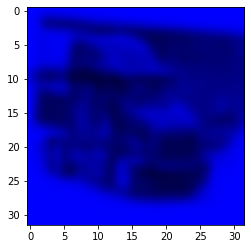

In [46]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
plt.imshow(transforms.ToPILImage()(augmented_data[33][14]), interpolation="bicubic")

In [48]:
# Thr 적용해서 Testing

#2. Loading Segmented dataset (our dataset)
"""---------------blue---------------"""
augmented_data = torch.load('blue_augmented_data.pt')
label_set = []
for _,labels in test_loader:
    label_set.append(labels)
augmented_labels = torch.stack(label_set, dim=0)

print(augmented_data.shape)
print(augmented_labels.shape)

# Test the model
model = torch.load('resnet_trained_model.ckpt')
model.load_state_dict(torch.load('resnet_trained_model_state.ckpt'))
model.eval()
with torch.no_grad():
    correct = 0
    total = 0
    for i in range(len(augmented_data)):
            images = augmented_data[i].to(device)
            labels = augmented_labels[i].to(device)
            outputs = model(images)
            _, predicted = torch.max(outputs.data, 1)    
            
            """수정된부분"""
            #index에 들어있는 사진들만 interfere를 진행
            for j in range(batch_size):
                if( (i*batch_size)+(j+1) in sorted_images_index_150):     
                    total += 1
                    if( predicted[j]==labels[j]):
                        correct += 1

    print('Accuracy of the model on the test images about Thr = 150 & blue: {} %'.format(100 * correct / total))
    
with torch.no_grad():
    correct = 0
    total = 0
    for i in range(len(augmented_data)):
            images = augmented_data[i].to(device)
            labels = augmented_labels[i].to(device)
            outputs = model(images)
            _, predicted = torch.max(outputs.data, 1)    
            
            """수정된부분"""
            #index에 들어있는 사진들만 interfere를 진행
            for j in range(batch_size):
                if( (i*batch_size)+(j+1) in sorted_images_index_100):     
                    total += 1
                    if( predicted[j]==labels[j]):
                        correct += 1

    print('Accuracy of the model on the test images about Thr = 100 & blue: {} %'.format(100 * correct / total))
    
with torch.no_grad():
    correct = 0
    total = 0
    for i in range(len(augmented_data)):
            images = augmented_data[i].to(device)
            labels = augmented_labels[i].to(device)
            outputs = model(images)
            _, predicted = torch.max(outputs.data, 1)    
            
            """수정된부분"""
            #index에 들어있는 사진들만 interfere를 진행
            for j in range(batch_size):
                if( (i*batch_size)+(j+1) in sorted_images_index_50):     
                    total += 1
                    if( predicted[j]==labels[j]):
                        correct += 1

    print('Accuracy of the model on the test images about Thr = 50 & blue: {} %'.format(100 * correct / total))

torch.Size([100, 100, 3, 32, 32])
torch.Size([100, 100])
Accuracy of the model on the test images about Thr = 150 & blue: 66.01098706361864 %
Accuracy of the model on the test images about Thr = 100 & blue: 63.49589570255915 %
Accuracy of the model on the test images about Thr = 50 & blue: 60.92142537647234 %


In [50]:
# Thr 적용해서 Testing

#2. Loading Segmented dataset (our dataset)
"""---------------green---------------"""
augmented_data = torch.load('green_augmented_data.pt')
label_set = []
for _,labels in test_loader:
    label_set.append(labels)
augmented_labels = torch.stack(label_set, dim=0)

print(augmented_data.shape)
print(augmented_labels.shape)

# Test the model
model = torch.load('resnet_trained_model.ckpt')
model.load_state_dict(torch.load('resnet_trained_model_state.ckpt'))
model.eval()
with torch.no_grad():
    correct = 0
    total = 0
    for i in range(len(augmented_data)):
            images = augmented_data[i].to(device)
            labels = augmented_labels[i].to(device)
            outputs = model(images)
            _, predicted = torch.max(outputs.data, 1)    
            
            """수정된부분"""
            #index에 들어있는 사진들만 interfere를 진행
            for j in range(batch_size):
                if( (i*batch_size)+(j+1) in sorted_images_index_150):     
                    total += 1
                    if( predicted[j]==labels[j]):
                        correct += 1

    print('Accuracy of the model on the test images about Thr = 150 & green: {} %'.format(100 * correct / total))
    
with torch.no_grad():
    correct = 0
    total = 0
    for i in range(len(augmented_data)):
            images = augmented_data[i].to(device)
            labels = augmented_labels[i].to(device)
            outputs = model(images)
            _, predicted = torch.max(outputs.data, 1)    
            
            """수정된부분"""
            #index에 들어있는 사진들만 interfere를 진행
            for j in range(batch_size):
                if( (i*batch_size)+(j+1) in sorted_images_index_100):     
                    total += 1
                    if( predicted[j]==labels[j]):
                        correct += 1

    print('Accuracy of the model on the test images about Thr = 100 & green: {} %'.format(100 * correct / total))
    
with torch.no_grad():
    correct = 0
    total = 0
    for i in range(len(augmented_data)):
            images = augmented_data[i].to(device)
            labels = augmented_labels[i].to(device)
            outputs = model(images)
            _, predicted = torch.max(outputs.data, 1)    
            
            """수정된부분"""
            #index에 들어있는 사진들만 interfere를 진행
            for j in range(batch_size):
                if( (i*batch_size)+(j+1) in sorted_images_index_50):     
                    total += 1
                    if( predicted[j]==labels[j]):
                        correct += 1

    print('Accuracy of the model on the test images about Thr = 50 & green: {} %'.format(100 * correct / total))

torch.Size([100, 100, 3, 32, 32])
torch.Size([100, 100])
Accuracy of the model on the test images about Thr = 150 & green: 72.37285132021974 %
Accuracy of the model on the test images about Thr = 100 & green: 70.17543859649123 %
Accuracy of the model on the test images about Thr = 50 & green: 67.73520202773221 %


In [51]:
# Thr 적용해서 Testing

#2. Loading Segmented dataset (our dataset)
"""---------------red---------------"""
augmented_data = torch.load('red_augmented_data.pt')
label_set = []
for _,labels in test_loader:
    label_set.append(labels)
augmented_labels = torch.stack(label_set, dim=0)

print(augmented_data.shape)
print(augmented_labels.shape)

# Test the model
model = torch.load('resnet_trained_model.ckpt')
model.load_state_dict(torch.load('resnet_trained_model_state.ckpt'))
model.eval()
with torch.no_grad():
    correct = 0
    total = 0
    for i in range(len(augmented_data)):
            images = augmented_data[i].to(device)
            labels = augmented_labels[i].to(device)
            outputs = model(images)
            _, predicted = torch.max(outputs.data, 1)    
            
            """수정된부분"""
            #index에 들어있는 사진들만 interfere를 진행
            for j in range(batch_size):
                if( (i*batch_size)+(j+1) in sorted_images_index_150):     
                    total += 1
                    if( predicted[j]==labels[j]):
                        correct += 1

    print('Accuracy of the model on the test images about Thr = 150 & red: {} %'.format(100 * correct / total))
    
with torch.no_grad():
    correct = 0
    total = 0
    for i in range(len(augmented_data)):
            images = augmented_data[i].to(device)
            labels = augmented_labels[i].to(device)
            outputs = model(images)
            _, predicted = torch.max(outputs.data, 1)    
            
            """수정된부분"""
            #index에 들어있는 사진들만 interfere를 진행
            for j in range(batch_size):
                if( (i*batch_size)+(j+1) in sorted_images_index_100):     
                    total += 1
                    if( predicted[j]==labels[j]):
                        correct += 1

    print('Accuracy of the model on the test images about Thr = 100 & red: {} %'.format(100 * correct / total))
    
with torch.no_grad():
    correct = 0
    total = 0
    for i in range(len(augmented_data)):
            images = augmented_data[i].to(device)
            labels = augmented_labels[i].to(device)
            outputs = model(images)
            _, predicted = torch.max(outputs.data, 1)    
            
            """수정된부분"""
            #index에 들어있는 사진들만 interfere를 진행
            for j in range(batch_size):
                if( (i*batch_size)+(j+1) in sorted_images_index_50):     
                    total += 1
                    if( predicted[j]==labels[j]):
                        correct += 1

    print('Accuracy of the model on the test images about Thr = 50 & red: {} %'.format(100 * correct / total))

torch.Size([100, 100, 3, 32, 32])
torch.Size([100, 100])
Accuracy of the model on the test images about Thr = 150 & red: 53.854332801701226 %
Accuracy of the model on the test images about Thr = 100 & red: 51.61757605021729 %
Accuracy of the model on the test images about Thr = 50 & red: 50.24601162964068 %


In [52]:
# Thr 적용해서 Testing

#2. Loading Segmented dataset (our dataset)
"""---------------red---------------"""
augmented_data = torch.load('black_augmented_data.pt')
label_set = []
for _,labels in test_loader:
    label_set.append(labels)
augmented_labels = torch.stack(label_set, dim=0)

print(augmented_data.shape)
print(augmented_labels.shape)

# Test the model
model = torch.load('resnet_trained_model.ckpt')
model.load_state_dict(torch.load('resnet_trained_model_state.ckpt'))
model.eval()
with torch.no_grad():
    correct = 0
    total = 0
    for i in range(len(augmented_data)):
            images = augmented_data[i].to(device)
            labels = augmented_labels[i].to(device)
            outputs = model(images)
            _, predicted = torch.max(outputs.data, 1)    
            
            """수정된부분"""
            #index에 들어있는 사진들만 interfere를 진행
            for j in range(batch_size):
                if( (i*batch_size)+(j+1) in sorted_images_index_150):     
                    total += 1
                    if( predicted[j]==labels[j]):
                        correct += 1

    print('Accuracy of the model on the test images about Thr = 150 & black: {} %'.format(100 * correct / total))
    
with torch.no_grad():
    correct = 0
    total = 0
    for i in range(len(augmented_data)):
            images = augmented_data[i].to(device)
            labels = augmented_labels[i].to(device)
            outputs = model(images)
            _, predicted = torch.max(outputs.data, 1)    
            
            """수정된부분"""
            #index에 들어있는 사진들만 interfere를 진행
            for j in range(batch_size):
                if( (i*batch_size)+(j+1) in sorted_images_index_100):     
                    total += 1
                    if( predicted[j]==labels[j]):
                        correct += 1

    print('Accuracy of the model on the test images about Thr = 100 & black: {} %'.format(100 * correct / total))
    
with torch.no_grad():
    correct = 0
    total = 0
    for i in range(len(augmented_data)):
            images = augmented_data[i].to(device)
            labels = augmented_labels[i].to(device)
            outputs = model(images)
            _, predicted = torch.max(outputs.data, 1)    
            
            """수정된부분"""
            #index에 들어있는 사진들만 interfere를 진행
            for j in range(batch_size):
                if( (i*batch_size)+(j+1) in sorted_images_index_50):     
                    total += 1
                    if( predicted[j]==labels[j]):
                        correct += 1

    print('Accuracy of the model on the test images about Thr = 50 & black: {} %'.format(100 * correct / total))

torch.Size([100, 100, 3, 32, 32])
torch.Size([100, 100])
Accuracy of the model on the test images about Thr = 150 & black: 63.06928938507886 %
Accuracy of the model on the test images about Thr = 100 & black: 60.63093513600515 %
Accuracy of the model on the test images about Thr = 50 & black: 58.17802296108543 %
